In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import keras
from keras.preprocessing import image    
import os
import PIL.Image as Image

Using TensorFlow backend.


In [8]:
model = tf.keras.models.load_model('drink-detection.h5')

## load images and classes

In [9]:
IMG_HEIGHT, IMG_WIDTH = 128, 128
IMG_SIZE = [IMG_HEIGHT,IMG_WIDTH]

test_dir = "./images/to_predict/"
files = os.listdir(test_dir)
images = list(map((lambda f: Image.open(test_dir+f).resize(IMG_SIZE)),files))

class_dir = "./images/cleaned"
classes = os.listdir(class_dir)


## predict images

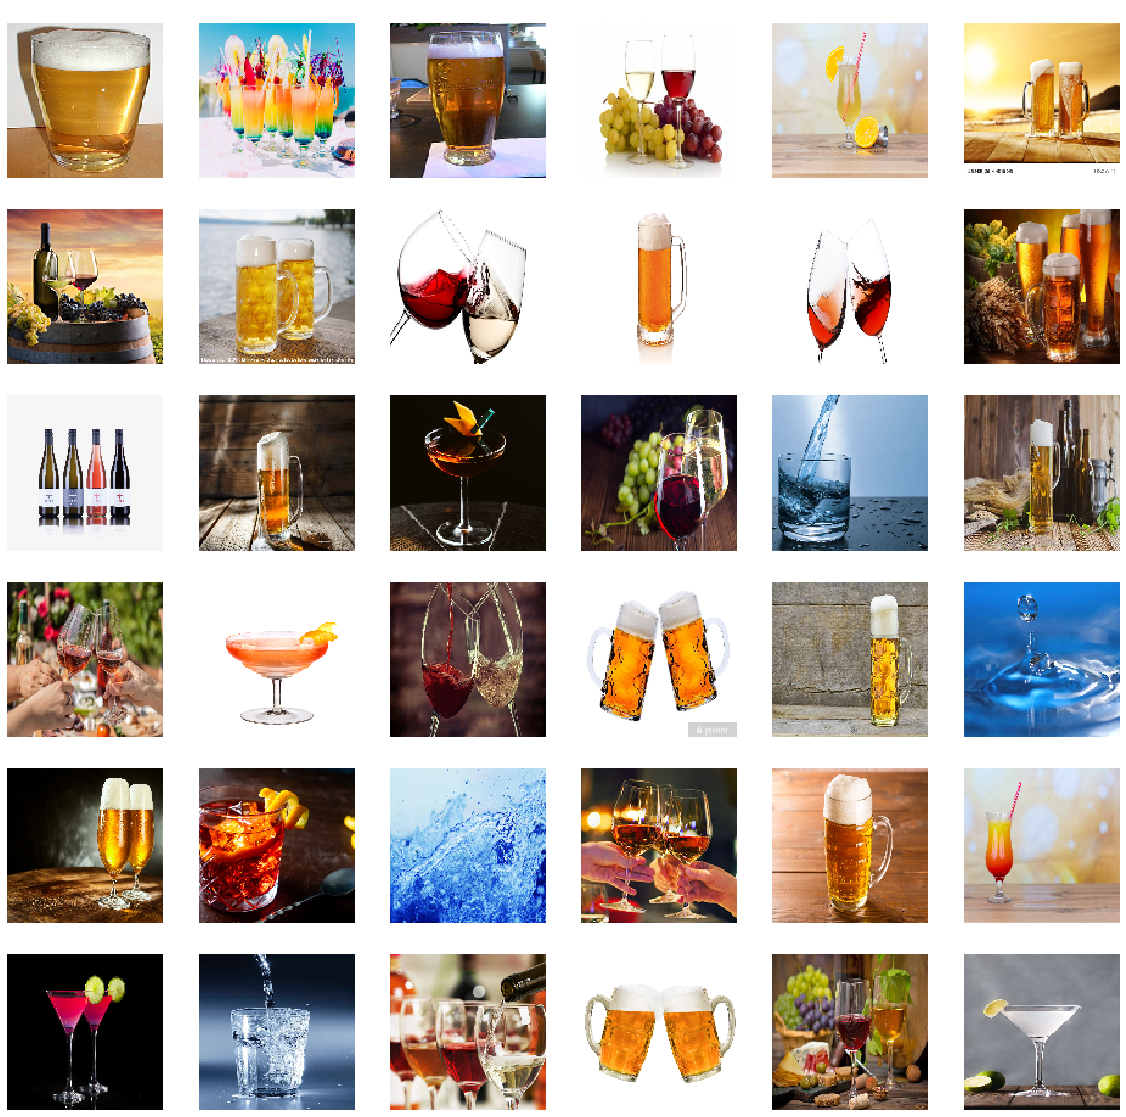

In [10]:
fig, axes = plt.subplots(int(len(images) / 6), 6, figsize=(20,20))
axes = axes.flatten()
   
for img, ax in zip(images, axes):
    img_data = np.array(img)/255.0
    
    prediction = model.predict(img_data[np.newaxis,:])
    
    predicted_class = np.argmax(prediction[0], axis=-1)
    
    ax.set_title("Pred %s %s" % (classes[predicted_class],prediction.shape))
    ax.imshow(img_data)
    ax.axis('off')
        
    